# Figure 2.6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

S = make_blobs(n_samples=500, n_features=2,centers=np.array([[0,1],[1,0]]))
trans = (np.sqrt(2)/2)*np.array([[-1,-20],[20,20]])
S_trans = np.matmul(S[0],trans)

trans = (np.sqrt(2)/2)*np.array([[-1,-20],[20,20]])
S_trans = np.matmul(S[0],trans)

#PCA
pca = PCA(n_components = 2)
pca.fit(S_trans)
pca_transformed = pca.transform(S_trans)


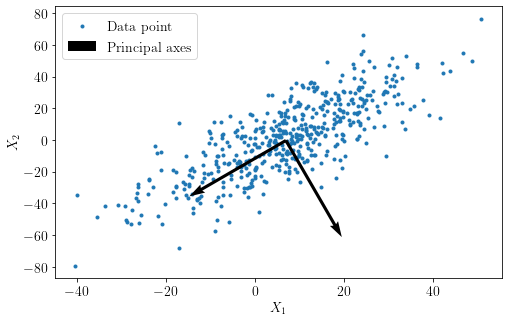

In [2]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = "serif"

quiver_s = pca.components_
fig,ax = plt.subplots(figsize=(8,5))
ax.scatter(S_trans[:,0],S_trans[:,1],marker='.',label='Data point')
ax.quiver((6.90417253, 6.90417253),
           (-0.34520975, -0.34520975),
           quiver_s[1],
           quiver_s[0],
            zorder=1,
            width=0.007,
            scale=4,
            color='k',
            label = 'Principal axes'
        )
ax.set_xlabel(r'$X_1$')
ax.set_ylabel(r'$X_2$')
plt.legend()
#plt.savefig('PCA_example.png', dpi = 300, bbox_inches = 'tight', pad_inches = .1)

### Figure 2.7 - UMAP swiss roll example

In [6]:
from sklearn.datasets import make_swiss_roll
import umap

# Generate data - swiss roll dataset
n_samples = 2000
noise = .00
X,y = make_swiss_roll(n_samples,noise=noise,random_state=10)


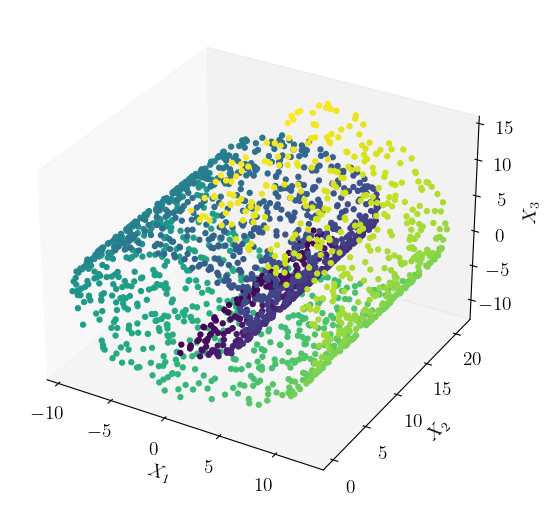

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
plt.style.use('default')
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = "serif"

fig3 = plt.figure(constrained_layout = True,figsize=(5,5))
gs = fig3.add_gridspec(1,1)

ax = fig3.add_subplot(gs[:,0],projection='3d')


ax.scatter(X[:,0],X[:,1],X[:,2],c=y,marker='.',s=50,cmap='viridis',alpha=1)
ax.set_xlabel(r'$X_1$');
ax.set_ylabel(r'$X_2$');
ax.set_zlabel(r'$X_3$');
ax.grid(False)
#plt.savefig('Swiss_Roll.png', dpi = 300, bbox_inches = 'tight', pad_inches = .1)

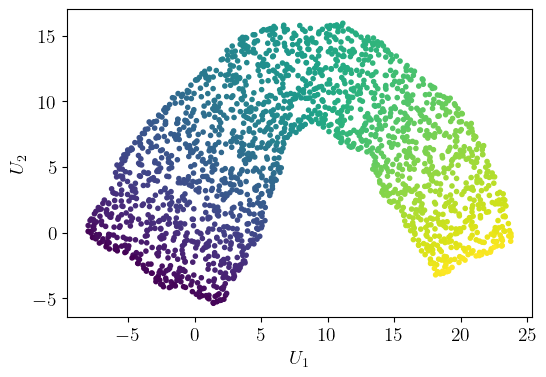

In [8]:
umap_transform = umap.UMAP(n_neighbors=50,min_dist=1,random_state=18,n_components=2)
umap_transform.fit(X)
umap_transformed = umap_transform.transform(X)

plt.figure(figsize=(6,4))
plt.scatter(umap_transformed[:,0],umap_transformed[:,1],c=y,cmap = 'viridis',marker='.')
plt.xlabel(r'$U_1$');
plt.ylabel(r'$U_2$');

#plt.savefig('Swiss_Roll_UMAP.png', dpi = 300, bbox_inches = 'tight', pad_inches = .1)